# **Lung Cancer Detection**

### Lung Cancer is also known as lung carcinoma, is a malignant lung tumor categorized by uncontrolled cell growth in tissues of lung. The growth can spread beyond lung by process of metastatis into nearby tissue or other body part.

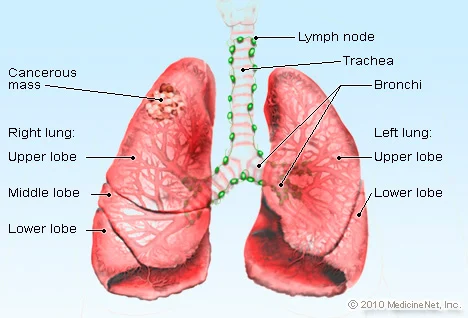

#import liabraries

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler

#Image preprocessing

In [ ]:
file=''

In [ ]:

from skimage import io
import cv2 as cv 
from gimport cv2_imshow # for image display


r=['C:/Users/admin/Documents/Data/project/Cancerdata/data/Malignant cases/Malignant case (1)',
   'C:/Users/admin/Documents/Data/project/Cancerdata/data/Malignant casesMalignant case (2)']
for url in r:
  image = io.imread(url) 
  image_2 = cv.cvtColor(image, cv.COLOR_BGR2RGB)
  final_frame = cv.hconcat((image, image_2))
  cv2_imshow(final_frame)
  print('\n')


SyntaxError: ignored

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


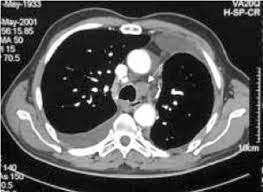

In [ ]:
gray_image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
cv2_imshow(gray_image)

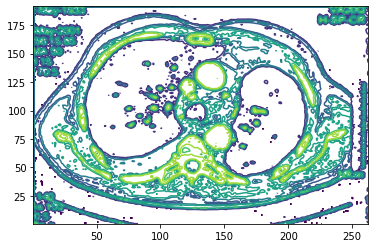

In [ ]:
plt.contour(gray_image, origin = "image")

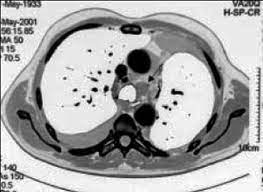

In [ ]:
# This is an inverse operation of the grayscale image, you could see that the
# bright pixels become dark, and the dark pixels become bright
im2 = 255 - gray_image
cv2_imshow(im2)

### Fourier Transform of Gray Images
[FFT](https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_transforms/py_fourier_transform/py_fourier_transform.html)
> A fourier transform is used to find the frequency domian of an image. You can consider an image as a signal which is sampled in two directions. So taking a fourier transform in both X and Y directions gives you the frequency representation of image. For the sinusoidal signal, if the amplitude varies so fast in short time, you can say it is a high frequency signal. If it varies slowly, it is a low frequency signal. Edges and noises are high frequency contents in an image because they change drastically in images.

Generate a fourier transform of your grayscale image
This section demonstrates conducting a high pass filter to remove the low frequency component, resulting in a sharpened image which contains the edges

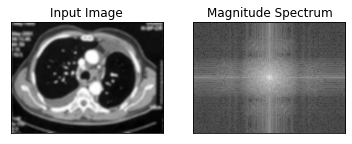

In [ ]:
# Blur the grayscale image by a Guassian filter with kernel size of 10
imBlur = cv.blur(gray_image,(5,5))
# Transform the image to frequency domain
f = np.fft.fft2(imBlur)
# Bring the zero-frequency component to the center
fshift = np.fft.fftshift(f)
magnitude_spectrum = 30*np.log(np.abs(fshift))

plt.subplot(121),plt.imshow(imBlur, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

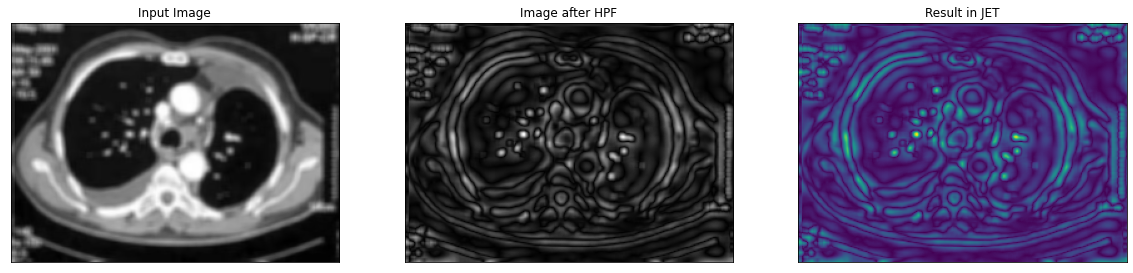

In [ ]:
rows, cols = imBlur.shape
crow,ccol = round(rows/2) , round(cols/2)
# remove low frequencies with a rectangle size of 10
fshift[crow-10:crow+10, ccol-10:ccol+10] = 0
f_ishift = np.fft.ifftshift(fshift)
img_back = np.fft.ifft2(f_ishift)
img_back = np.abs(img_back)

plt.figure(figsize=([20, 20]))
plt.subplot(131),plt.imshow(imBlur, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(img_back, cmap = 'gray')
plt.title('Image after HPF'), plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(img_back)
plt.title('Result in JET'), plt.xticks([]), plt.yticks([])
plt.show()

In [ ]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import ZeroPadding2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [ ]:
data='C:/Users/admin/Documents/Data/project/Cancerdata/data/'

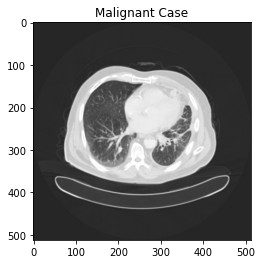

In [ ]:
img = cv2.imread("C:/Users/admin/Documents/Data/project/Cancerdata/data/Malignant cases/Malignant case (1).jpg")
plt.title("Malignant Case")
plt.imshow(img)

In [ ]:
datagen = ImageDataGenerator(rescale = 1/255.0, validation_split = 0.1)
train_data_generator = datagen.flow_from_directory(directory=data, target_size = (1, 255), color_mode="grayscale", class_mode="categorical", batch_size = 16, subset = "training", shuffle="True")
validation_data_generator = datagen.flow_from_directory(directory=data, target_size = (1,255),color_mode="grayscale", class_mode="categorical", batch_size = 16,subset = "validation")


Found 988 images belonging to 3 classes.
Found 109 images belonging to 3 classes.


In [ ]:
train_data_generator.next()[1]

array([[0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.]], dtype=float32)

#Creating the Model

**create a Convolutional Neural Network to predict the correct classes of cells from the images. We have used 3 Conv2D layers with MaxPool2D layers after each for the feature extraction from the images. The activation function used is ReLU. The output layer has only three neurons corresponding to the three classes of tumors (Benign, Malignant, Normal), with Softmax activation function.
**

In [ ]:
training = ImageDataGenerator(rescale=1/53)
validation = ImageDataGenerator(rescale=1/53)

In [ ]:
pip install split-folders

In [ ]:
import splitfolders
splitfolders.ratio(data, output="output", seed=1337, ratio=(.8, 0.1,0.1)) 

Copying files: 1097 files [00:45, 24.29 files/s]


In [ ]:
# Create Image Data Generator for Train Set
image_gen = ImageDataGenerator(
                                  rescale = 1./255,
                                  shear_range = 0.2,
                                  zoom_range = 0.2,
                                  horizontal_flip = True,          
                               )
# Create Image Data Generator for Test/Validation Set
test_data_gen = ImageDataGenerator(rescale = 1./255)
#The batch refers to the number of training examples utilized in one #iteration
batch_size = 16 
#The dimension of the images we are going to define is 500x500 img_height = 500
img_width = 500
img_height=500

In [ ]:
model = tf.keras.models.Sequential([ tf.keras.layers.Conv2D(16,(3,3),activation = 'relu',input_shape=(200,200,3)),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    #
                                    tf.keras.layers.Conv2D(32,(3,3),activation = 'relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    #
                                    tf.keras.layers.Conv2D(64,(3,3),activation = 'relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    ##
                                    tf.keras.layers.Flatten(),
                                    ##
                                    tf.keras.layers.Dense(512,activation='relu'),
                                    ##
                                    tf.keras.layers.Dense(1,activation='sigmoid'),
                                   ])
                                    

In [ ]:
my_callback = [tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 10, restore_best_weights = True)]

Compiling and Training the Model
We will compile the model with Adam as the optimizer and Categorical Crossentropy as the loss function. We will train the model for 50 epochs with the callback. We will store the accuracy, loss, val_accuracy and val_loss at each epoch in the history for plotting meaningful data later.

In [ ]:
from tensorflow.keras.optimizers import RMSprop
model.compile(loss= 'binary_crossentropy',
             optimizer = RMSprop(lr=0.001),
             metrics =['accuracy'])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 198, 198, 16)      448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 99, 99, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 97, 97, 32)        4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 48, 48, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 46, 46, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 23, 23, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 33856)            

In [ ]:
train='C:/Users/admin/Documents/Data/project/Cancerdata/output/train/'
test='C:/Users/admin/Documents/Data/project/Cancerdata/output/test/'
valid= 'C:/Users/admin/Documents/Data/project/Cancerdata/output/valid/'

In [ ]:
history=model.fit(train, steps_per_epoch=len(train), epochs=50, validation_data=valid, validation_steps = len(valid), callbacks=my_callback)

IndexError: list index out of range

In [ ]:
import time
time.sleep(0.1)

In [ ]:
history = model.fit(train,
                      steps_per_epoch = 5,
                      epochs=45,
                     validation_data= valid)
time.sleep(2)

IndexError: list index out of range

Accuracy & Loss




We will now plot the model performance at each epoch during the training phase.

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

NameError: name 'history' is not defined

In [ ]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
from tensorflow.keras.layers import MaxPooling2D

In [ ]:
model=Sequential()

model.add(Conv2D(filters=16,kernel_size=2,padding="same",activation="relu",input_shape=(224,224,3)))

In [ ]:
model=Sequential()

model.add(Conv2D(filters=16,kernel_size=2,padding="same",activation="relu",input_shape=(224,224,3)))

In [ ]:
model.add(Conv2D(filters=32,kernel_size=2,padding="same",activation ="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=64,kernel_size=2,padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=2))

In [ ]:
model.add(Flatten())

In [ ]:
model.add(Dense(500,activation="relu"))

model.add(Dense(2,activation="softmax"))

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train, train, epochs=10, 
                    validation_data=(test, test))


IndexError: list index out of range